In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

import theano.tensor as T
import theano
from itertools import izip
import random
from random import shuffle


## 讀取 Miku

In [2]:
img_count = 0
def showimg(img):
    muki_pr = np.zeros((500,500,3))
    l =img.tolist()
    count = 0
    for x in range(500):
        for y in range(500):
            muki_pr[y][x] = l[count]
            count += 1
    plt.imshow(muki_pr)
def saveimg(fname,img):
    muki_pr = np.zeros((500,500,3))
    l =img.tolist()
    count = 0
    for x in range(500):
        for y in range(500):
            muki_pr[y][x] = l[count]
            count += 1
    plt.imsave(fname,muki_pr)

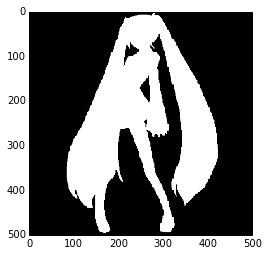

In [3]:
def read_muki():
    img_data = np.random.randn(250000,1)
    xy_data = []
    import random

    f = open('./muki.txt','rb')
    count = 0
    for line in f:
        y,x,c = line.split()
        xy_data.append([float(x),float(y)])
        x = (float(x) )*100. + 250
        y = (float(y) )*100. + 250
        c = float(c)

        img_data[count] = c
        
        count = count + 1
    return np.matrix(xy_data),img_data

xy_data,img_data = read_muki()    
showimg(img_data)


In [4]:
print xy_data[:10]
print img_data[:10]

[[-2.5  -2.5 ]
 [-2.49 -2.5 ]
 [-2.48 -2.5 ]
 [-2.47 -2.5 ]
 [-2.46 -2.5 ]
 [-2.45 -2.5 ]
 [-2.44 -2.5 ]
 [-2.43 -2.5 ]
 [-2.42 -2.5 ]
 [-2.41 -2.5 ]]
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]


## Muki NN
<img width=500px src='./muki_nn.png' />

In [5]:
batch_size = 500
hidden_size = 128

In [6]:
x = T.matrix(name='x',dtype='float32') # size =2
y = T.matrix(name='x',dtype='float32') # size =1


w1 = theano.shared(np.random.randn(hidden_size,2))
b1 = theano.shared(np.random.randn(hidden_size))
w2 = theano.shared(np.random.randn(1,hidden_size))
b2 = theano.shared(np.random.randn(1))

## 第一層

In [7]:
z1 = T.dot(w1,x) + b1.dimshuffle(0,'x')
a1 = 1/(1+T.exp(-z1))

In [8]:
fa1 = theano.function(inputs=[x],outputs=[a1],allow_input_downcast=True)
l1_o= fa1(np.random.randn(2,batch_size))


In [9]:
l1_o= fa1(xy_data[:500].T)

## 第二層

In [10]:
z2 = T.dot(w2,a1) + b2.dimshuffle(0,'x')
a2 = 1/(1+T.exp(-z2))

In [11]:
fa2 = theano.function(inputs=[x],outputs=[a2],allow_input_downcast=True)

In [12]:
l2_o = fa2(np.random.randn(2,batch_size))

In [13]:
l2_o= fa2(xy_data[:500].T)
print l2_o[0].shape

(1, 500)


## 第三層下次吧，電腦太慢了懶的跑了　

## 定義 Cost Function & Update Function

In [14]:
y_hat = T.matrix('reference',dtype='float32')
cost = T.sum((a2-y_hat)**2)/batch_size

In [15]:
dw1,dw2,db1,db2 = T.grad(cost,[w1,w2,b1,b2])

def Myupdates(ps,gs):
    from itertools import izip
 
    r = 1
    pu = [ (p,p-r*g) for p,g in izip(ps,gs)   ]
    return pu

In [16]:
train = theano.function(inputs=[x,y_hat],
                        outputs=[a2,cost],
                        updates=Myupdates([w1,b1,w2,b2],[dw1,db1,dw2,db2]),
                        allow_input_downcast=True,)

## Training

In [17]:

def training(xy_data,img_data):
    for ii in range(1000):
        for i in range(500):

            start = i * 500 
            end  = start + 500
            img_predict,cost_predict = train(xy_data[start:end].T,img_data[start:end].T)

        if ii % 10 == 0:
            saveimg('./imgs/muki_'+ str(ii) +'.png', fa2(xy_data.T)[0].T)
        print cost_predict,

In [18]:
training(xy_data,img_data)

3.68922202807e-05 1.15600810038e-05 8.87783956542e-06 7.58236531873e-06 6.76803229779e-06 6.05372690517e-06 5.45166879955e-06 5.04053937106e-06 4.95409211863e-06 5.01633538045e-06 5.0670913027e-06 5.5908265385e-06 6.24761722955e-06 7.11263578722e-06 8.14213325491e-06 9.33796990244e-06 1.07025899435e-05 1.00929451679e-05 1.14624110985e-05 1.09105704786e-05 1.02575543805e-05 9.67448778786e-06 9.12718978355e-06 8.5977823963e-06 8.08459839463e-06 7.58921849736e-06 7.10028231849e-06 6.60279846303e-06 6.09868949193e-06 5.58799918492e-06 5.06407679325e-06 4.53065749198e-06 4.00033750716e-06 3.48831555668e-06 3.01420332735e-06 2.62586258298e-06 2.30455603939e-06 1.95853576703e-06 1.60366623901e-06 1.55701214989e-06 1.2677478909e-06 5.82396374676e-07 4.68192789628e-07 4.06235793857e-07 3.25995959408e-07 2.56180776753e-07 1.99377439333e-07 1.57276060036e-07 9.08657961363e-08 6.89014608075e-08 4.09134412444e-08 3.43300165275e-08 1.99747141551e-08 1.34790134256e-08 9.38337906922e-09 6.63804470947e

KeyboardInterrupt: 

## Training - Random Suffule

In [ ]:
all_data = zip(xy_data,img_data)
shuffle(all_data)
temp_xy = []
temp_data = []
for row in all_data:
    temp_xy.append(row[0].tolist()[0])
    temp_data.append(row[1])


In [ ]:
s_data = np.matrix(temp_data)
s_xy = np.matrix(temp_xy)


## Testing

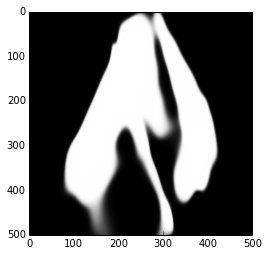

In [19]:
showimg(fa2(xy_data.T)[0].T)

## 結論:
* data 作 random suffule 的效果奇差，原因可以解釋為其實圖片的資料上下位置有相關系，如果 random 打算在作 mini batch ,反而
* 在 hidden layer 設 128 個 neuron解釋力較強，至於原因需要再探咎
* 128 nerou <img width=100px src='./imgs/1_128_1/muki_810.png'>
* <a href='./imgs/output_2_128_1.mp4'>Training 過程</a>
* 256 nerou <img width=100px src='./imgs/2_256_1/muki_740.png/'>
* <a href='./imgs/output_2_256_1.mp4'>Training 過程</a>

